In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

import sys
sys.path.append("/home/zoso/Documenti/librerie")
import fra_lib as fra

# Array dati

In [6]:
n_bul = np.array([0, 2, 3, 4, 6])
T_0= np.array([13.559,13.650,13.180,13.103,13.065,13.252,13.398,13.219,13.279,13.115])
T_2=np.array([16.5, 16.39, 16.7, 16.45, 16.63, 16.45, 16.38, 16.4, 16.28, 16.53])
T_3=np.array([17.82, 17.75, 18.09, 17.78, 17.83, 17.89, 18.01, 18.08, 17.89, 17.95])
T_4=np.array([18.97, 18.81, 18.75, 18.94, 19.06, 19.25, 19, 19.26, 18.95, 19.13])
T_6=np.array([21.4, 21.51, 21.45, 21.58, 21.45, 21.58, 21.68, 21.45, 21.57, 21.62])

T_n=np.array([23.64, 23.59, 23.52, 23.2, 23.37])


bulloni_misurati=np.array([53.8, 53.4, 53.9, 53.5, 53.4, 54])
M=bulloni_misurati.mean()
std= np.std(bulloni_misurati)
T_quad=np.array([T_0.mean()**2, T_2.mean()**2, T_3.mean()**2, T_4.mean()**2, T_6.mean()**2])
print(T_quad)

a=fra.s_q(T_0, 0.053)
b=fra.s_q(T_2, 0.053)
c=fra.s_q(T_3, 0.053)
d=fra.s_q(T_4, 0.053)
e=fra.s_q(T_6, 0.053)
u_T_quad= np.array([T_0.mean()*2*a, T_2.mean()*2*b, T_3.mean()*2*c, T_4.mean()*2*d, T_6.mean()*2*e])

print(u_T_quad, std)


fra.s_q(T_n, 0.053)
T_n.mean()

[176.411524 271.293841 320.732281 361.456144 463.497841]
somma in quadratura delle incertezze: 0.10266612553969949
somma in quadratura delle incertezze: 0.07683965989860522
somma in quadratura delle incertezze: 0.07558585993571953
somma in quadratura delle incertezze: 0.09203441385336983
somma in quadratura delle incertezze: 0.06668249812023815
[2.17024249 2.17433837 2.33809828 2.85551548 2.59342798] 0.24267032964268398
somma in quadratura delle incertezze: 0.09609890738192611


23.464000000000002

In [7]:
nM=np.array([M*0, M*2, M*3, M*4, M*6])
nM=nM*0.001
u_nM=np.array([std*0, std*2, std*3, std*4, std*6])
u_nM=u_nM*0.001



# Fit lineare

m         =  886.9658
sigma(m)  =  9.9686
c         =  176.1542
sigma(c)  =  1.7879
cov(m, c) =  -14.2999
rho(m, c) =  -0.8023


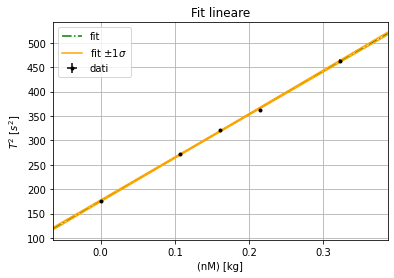

Chi^2mis = 4.2326
ndf = 3
p_value=0.24 > 0.05
Test del Chi2 al livello di significatività alpha=0.05 superato


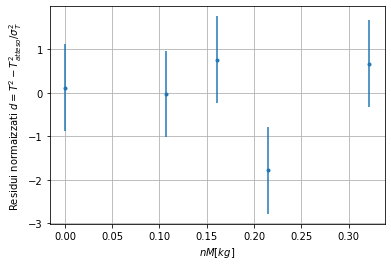

In [8]:
m, sm, c, sc, cov, rho, alpha = fra.lin_fit(nM, T_quad, u_T_quad, xlabel="(nM) [kg]", ylabel="$T^2$ [$s^2$]", ylabel1="$T^2$", uy_label="$s^2$", plot=True, residui=False, chi2=True)

fra.residui_norm(m, c, nM, T_quad, u_T_quad, y_label="T^2", uy_label="s^2", x_label="nM[kg]")

In [7]:
print(u_nM*m, u_T_quad)

[0.         0.43048056 0.64572084 0.86096112 1.29144168] [2.17024249 2.17433837 2.33809828 2.85551548 2.59342798]


In [15]:
a,b=fra.y_estrapolato(0.4139, m, c, sm, sc, cov)

b=b**2+m**2*0.0014**2
print(np.sqrt(a), np.sqrt(b)/(2*a))

23.30813824239344 0.0028995016420571783


In [16]:
fra.confronto(23.308, 23.464, 0.096, 0.0029)
#
# incertezze con nuovo uy
#uy = np.sqrt((m*u_nM)**2+u_T_quad**2)
#m, sm, c, sc, cov, rho, alpha = fra.lin_fit(nM, T_quad, uy, xlabel="x [ux]", ylabel="y [uy]", ylabel1="y", uy_label="uy", plot=True, residui=True, chi2=False)

-1.6242590655478202

## Tabella input

In [17]:
#è sufficiente mettere al posto di x array sulle X, al posto di y array sulle Y
    #al posto di uy l'array delle incertezze definitive
# le unità di misura sono quelle ovvie per le medie, per la varianza e unità di x 
    #al quadrato, per la coavrianza prodotto tra x e y e per l'ultima riga l'inverso
    #al quadrato di y

fra.saint_tab(nM, T_quad, u_T_quad)

$\overline{x}$ & 0.1 & UNITÀ \\ 
\hline 

$\overline{y}$ & 303.8 & UNITÀ \\ 
\hline 

$\overline{x^2}$ & 0.0 & UNITÀ \\ 
\hline 

$\overline{xy}$ & 53.9 & UNITÀ \\ 
\hline 

$Var[x]$ & 0.0 & UNITÀ \\ 
\hline 

$Cov[x,y]$ & 10.2 & UNITÀ \\ 
\hline 

$\sum_i \sigma_{y_i}^{-2}$ & 0.9 & UNITÀ \\ 
\hline 

